# Advanced NN

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

data_dir = '/content/drive/MyDrive/NN심화 강의자료/'

# 데이터 확인

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

데이터 출처: https://github.com/zalandoresearch/fashion-mnist

In [126]:
Train = pd.read_csv(data_dir + 'Train.csv')
Test = pd.read_csv(data_dir + 'Test.csv')
submission = pd.read_csv(data_dir + 'submission.csv')

In [127]:
Train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,44,168,122,133,137,134,128,145,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,255,...,255,222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,163,106,0,0,94,164,139,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,100,198,119,40,0,67,147,190,102,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,176,162,181,...,212,244,100,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,185,206,194,190,188,166,161,154,169,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [128]:
Train['label'].nunique()

10

In [129]:
Test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,8,...,142,155,161,158,0,0,64,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,110,120,115,134,136,136,123,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,0,13,13,0,6,73,13,0,0,2,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,14,8,...,174,165,118,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,80,46,24,9,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,24,154,138,117,147,255,28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,27,43,48,31,...,94,84,51,46,84,52,0,0,0,0,0,0,0,0,0,0,0,0,0,97,177,157,96,79,87,99,85,100,100,114,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,83,128,117,109,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,100,...,194,197,206,24,113,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,86,85,115,96,107,110,98,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,57,0,0,0,0,0,48,16,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,157,117,...,0,1,0,18,223,5,0,0,0,0,0,0,0,0,0,0,0,0,45,44,0,5,0,0,0,0,0,0,0,1,0,0,63,0,0,0,0,0,0,0


In [130]:
submission.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [132]:
X = Train.iloc[:, :-1].values
X = X.reshape(-1, 28, 28, 1)
y = Train.iloc[:, -1].values

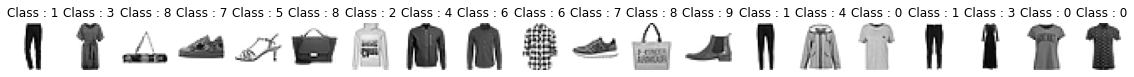

In [ ]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [133]:
X_test = Test.values
X_test = X_test.reshape(-1, 28, 28, 1)

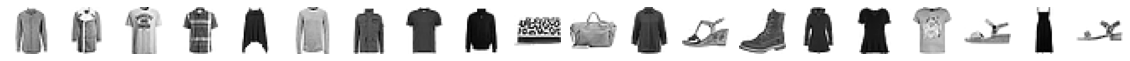

In [ ]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

# 데이터 분리

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Simple DNN

In [ ]:
BATCH_SIZE = 128
EPOCHS = 15

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='linear'),
    keras.layers.Dense(256, activation='linear'),
    keras.layers.Dense(128, activation='linear'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.4056 - accuracy: 0.8557 - val_loss: 0.4230 - val_accuracy: 0.8524
Epoch 2/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3979 - accuracy: 0.8603 - val_loss: 0.4206 - val_accuracy: 0.8546
Epoch 3/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3950 - accuracy: 0.8601 - val_loss: 0.4206 - val_accuracy: 0.8576
Epoch 4/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3922 - accuracy: 0.8611 - val_loss: 0.4147 - val_accuracy: 0.8610
Epoch 5/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3903 - accuracy: 0.8628 - val_loss: 0.4142 - val_accuracy: 0.8576
Epoch 6/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3901 - accuracy: 0.8621 - val_loss: 0.4346 - val_accuracy: 0.8473
Epoch 7/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3888 - accuracy: 0.8624 - val_loss: 0.4207 - val_accuracy:

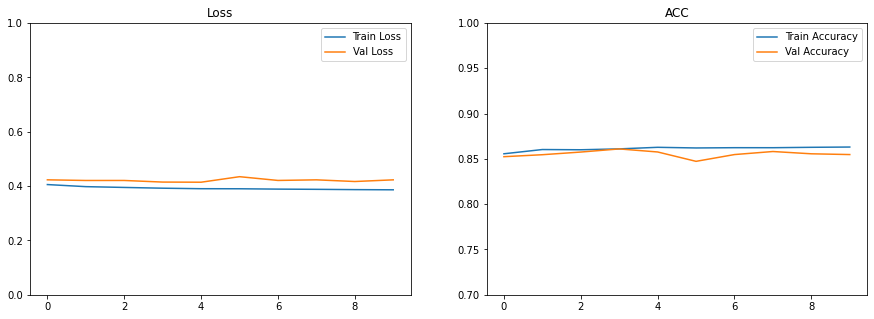

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Activation Function

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.6416 - accuracy: 0.7823 - val_loss: 0.4552 - val_accuracy: 0.8419
Epoch 2/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4443 - accuracy: 0.8414 - val_loss: 0.4005 - val_accuracy: 0.8595
Epoch 3/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3972 - accuracy: 0.8568 - val_loss: 0.3702 - val_accuracy: 0.8674
Epoch 4/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3699 - accuracy: 0.8658 - val_loss: 0.3727 - val_accuracy: 0.8677
Epoch 5/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.3472 - accuracy: 0.8721 - val_loss: 0.3433 - val_accuracy: 0.8766
Epoch 6/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3301 - accuracy: 0.8778 - val_loss: 0.3782 - val_accuracy: 0.8581
Epoch 7/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3145 - accuracy: 0.8838 - val_loss: 0.3340 - val_accuracy:

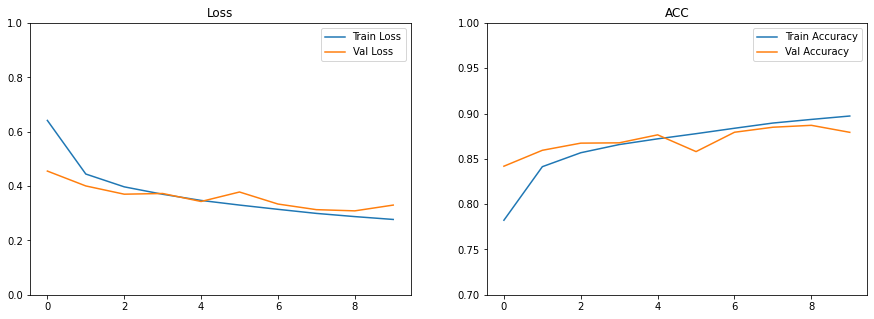

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Weight Initialization

In [ ]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(256, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.5944 - accuracy: 0.7955 - val_loss: 0.4328 - val_accuracy: 0.8467
Epoch 2/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4271 - accuracy: 0.8486 - val_loss: 0.3783 - val_accuracy: 0.8657
Epoch 3/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3820 - accuracy: 0.8636 - val_loss: 0.3915 - val_accuracy: 0.8591
Epoch 4/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3549 - accuracy: 0.8702 - val_loss: 0.3521 - val_accuracy: 0.8735
Epoch 5/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3323 - accuracy: 0.8783 - val_loss: 0.3372 - val_accuracy: 0.8755
Epoch 6/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3147 - accuracy: 0.8850 - val_loss: 0.3355 - val_accuracy: 0.8789
Epoch 7/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3007 - accuracy: 0.8886 - val_loss: 0.3188 - val_accuracy:

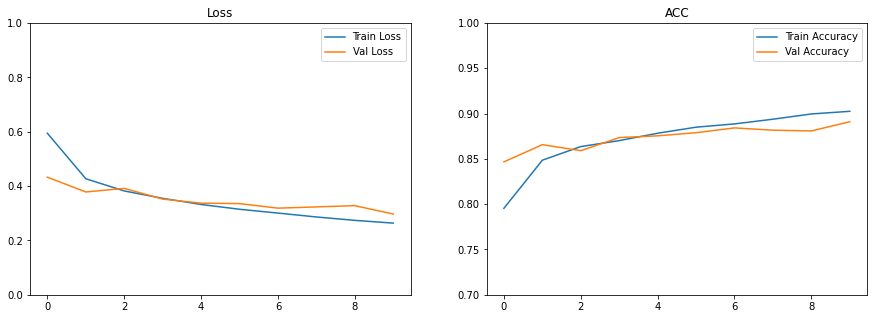

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Batch Normalization

In [ ]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_4 (Activation)    (None, 256)              

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.5391 - accuracy: 0.8141 - val_loss: 0.3948 - val_accuracy: 0.8575
Epoch 2/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3868 - accuracy: 0.8612 - val_loss: 0.3740 - val_accuracy: 0.8618
Epoch 3/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3391 - accuracy: 0.8780 - val_loss: 0.3317 - val_accuracy: 0.8779
Epoch 4/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3057 - accuracy: 0.8895 - val_loss: 0.3354 - val_accuracy: 0.8767
Epoch 5/10
1488/1488 [==============================] - 10s 6ms/step - loss: 0.2805 - accuracy: 0.8979 - val_loss: 0.3111 - val_accuracy: 0.8847
Epoch 6/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.2591 - accuracy: 0.9051 - val_loss: 0.3084 - val_accuracy: 0.8869
Epoch 7/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.2372 - accuracy: 0.9127 - val_loss: 0.3575 - val_ac

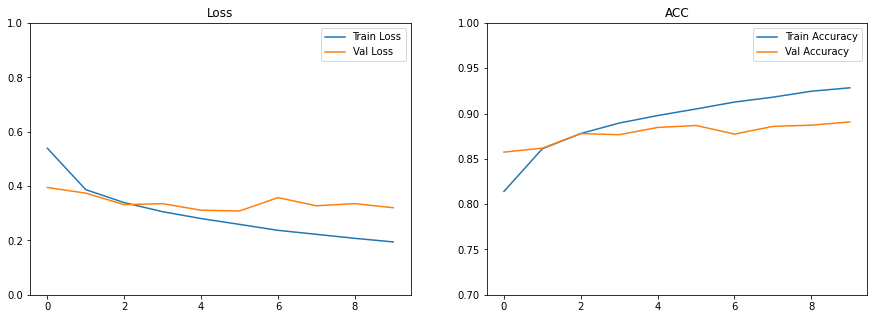

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Optimization

In [ ]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)              

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.5515 - accuracy: 0.8021 - val_loss: 0.4283 - val_accuracy: 0.8382
Epoch 2/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.4205 - accuracy: 0.8459 - val_loss: 0.3894 - val_accuracy: 0.8584
Epoch 3/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3843 - accuracy: 0.8595 - val_loss: 0.3837 - val_accuracy: 0.8573
Epoch 4/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3540 - accuracy: 0.8699 - val_loss: 0.3714 - val_accuracy: 0.8679
Epoch 5/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3281 - accuracy: 0.8781 - val_loss: 0.3353 - val_accuracy: 0.8750
Epoch 6/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3107 - accuracy: 0.8838 - val_loss: 0.3163 - val_accuracy: 0.8856
Epoch 7/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.2916 - accuracy: 0.8907 - val_loss: 0.3116 - val_ac

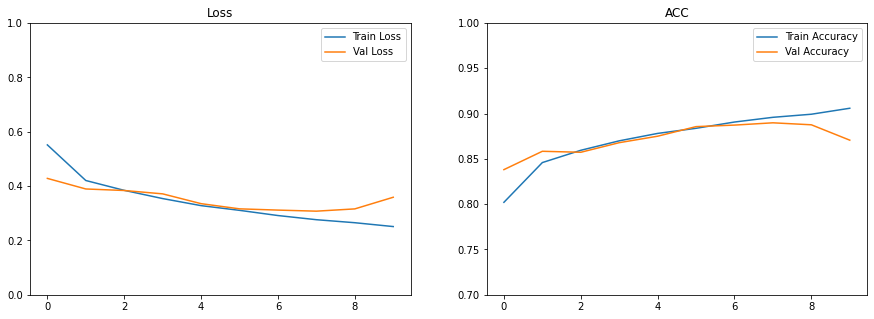

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Dropout

In [ ]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)              

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 12s 7ms/step - loss: 0.5989 - accuracy: 0.7855 - val_loss: 0.5030 - val_accuracy: 0.8215
Epoch 2/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.4761 - accuracy: 0.8292 - val_loss: 0.3918 - val_accuracy: 0.8485
Epoch 3/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.4311 - accuracy: 0.8480 - val_loss: 0.3755 - val_accuracy: 0.8616
Epoch 4/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.4053 - accuracy: 0.8521 - val_loss: 0.3447 - val_accuracy: 0.8771
Epoch 5/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3857 - accuracy: 0.8597 - val_loss: 0.3261 - val_accuracy: 0.8814
Epoch 6/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3662 - accuracy: 0.8674 - val_loss: 0.3293 - val_accuracy: 0.8804
Epoch 7/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3528 - accuracy: 0.8719 - val_loss: 0.3277 - val_ac

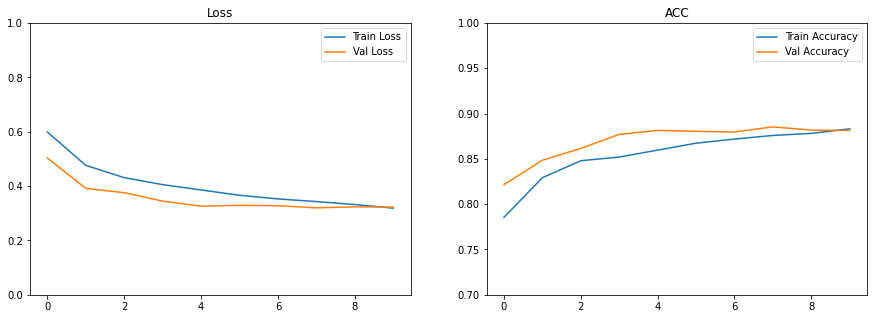

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Regularization

In [ ]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)              

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.5652 - accuracy: 0.7971 - val_loss: 0.4074 - val_accuracy: 0.8450
Epoch 2/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.4193 - accuracy: 0.8475 - val_loss: 0.3289 - val_accuracy: 0.8771
Epoch 3/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3698 - accuracy: 0.8660 - val_loss: 0.3053 - val_accuracy: 0.8858
Epoch 4/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3336 - accuracy: 0.8766 - val_loss: 0.3056 - val_accuracy: 0.8887
Epoch 5/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3158 - accuracy: 0.8827 - val_loss: 0.3019 - val_accuracy: 0.8903
Epoch 6/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.2937 - accuracy: 0.8909 - val_loss: 0.2779 - val_accuracy: 0.8962
Epoch 7/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.2789 - accuracy: 0.8967 - val_loss: 0.2742 - val_ac

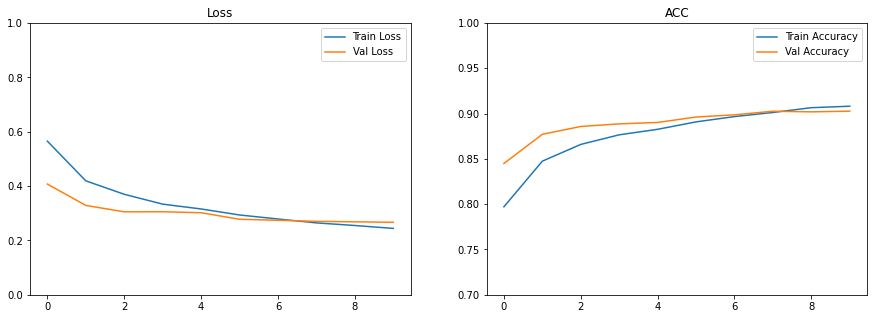

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# 제출

In [135]:
BATCH_SIZE = 128
EPOCHS = 100

In [136]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
activation_21 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)             

In [137]:
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [138]:
result = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_val, y_val), batch_size=BATCH_SIZE)

Epoch 1/100
372/372 [==============================] - 4s 8ms/step - loss: 0.5261 - accuracy: 0.8081 - val_loss: 0.5359 - val_accuracy: 0.8091
Epoch 2/100
372/372 [==============================] - 3s 8ms/step - loss: 0.4048 - accuracy: 0.8521 - val_loss: 0.3615 - val_accuracy: 0.8651
Epoch 3/100
372/372 [==============================] - 3s 7ms/step - loss: 0.3562 - accuracy: 0.8684 - val_loss: 0.3549 - val_accuracy: 0.8694
Epoch 4/100
372/372 [==============================] - 3s 8ms/step - loss: 0.3251 - accuracy: 0.8803 - val_loss: 0.3367 - val_accuracy: 0.8755
Epoch 5/100
372/372 [==============================] - 3s 8ms/step - loss: 0.3000 - accuracy: 0.8897 - val_loss: 0.3124 - val_accuracy: 0.8850
Epoch 6/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2818 - accuracy: 0.8950 - val_loss: 0.2982 - val_accuracy: 0.8878
Epoch 7/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2657 - accuracy: 0.9004 - val_loss: 0.2953 - val_accuracy: 0.8903

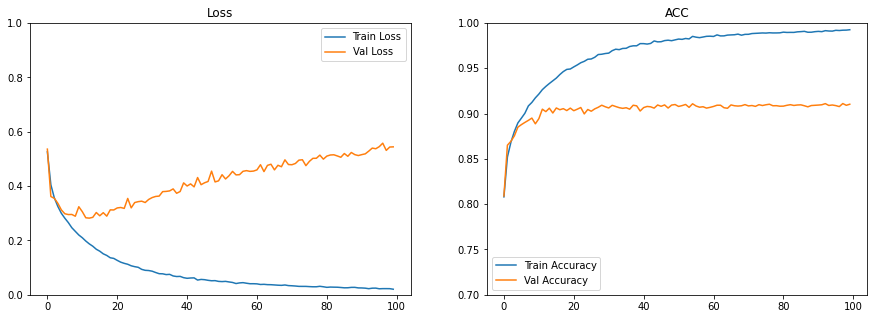

In [139]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

In [141]:
pred_label = np.argmax(model.predict(X_test), axis = 1)

submission['label'] = pred_label

submission.to_csv(data_dir + 'BaseLine_Model.csv', index = False)

submission.head()

,id,label
0,0,6
1,1,4
2,2,0
3,3,0
4,4,6
